#**Customer Segmentation Analysis**

##**1.Load the dataset**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Load the dataset
data = pd.read_csv('/content/ifood_df.csv')

# Display first few rows to understand the structure
data.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [ ]:
# Check dataset information (datatypes, missing values, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [ ]:
# Check for basic statistics
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


##**2.Data Exploration and cleaning**

In [ ]:
# Check for missing values
data.isnull().sum()

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
data.nunique()

,0
Income,1963
Kidhome,3
Teenhome,3
Recency,100
MntWines,775
MntFruits,158
MntMeatProducts,551
MntFishProducts,182
MntSweetProducts,176
MntGoldProds,212


In [ ]:
# Remove duplicates (if any)
data.drop_duplicates(inplace=True)

In [ ]:
print(data.shape)

(2021, 39)


In [ ]:
# Check for outliers in numerical columns
numerical_cols = data.select_dtypes(exclude=['object']).columns  # Select numeric columns

for col in numerical_cols:
    # Calculate IQR and bounds
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
   # Print the number of outliers in the column
    print(f"Number of outliers in {col}: {outliers.shape[0]}")


NameError: name 'data' is not defined

In [ ]:
# Remove outliers from numerical columns
numerical_cols = data.select_dtypes(exclude=['object']).columns  # Select numeric columns

for col in numerical_cols:
    # Calculate IQR and bounds
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the data to exclude outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Check the new shape of the dataset after outlier removal
print(f"Shape of data after outlier removal: {data.shape}")


Shape of data after outlier removal: (290, 39)


##**3.Feature Engineering**

In [ ]:
# Combine spending columns into total spending categories
data['MntTotal'] = (data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] +
                    data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds'])

# Age feature
data['Age'] = data['Customer_Days'] // 365  # Convert days to years

# Drop unnecessary columns
columns_to_drop = ['Z_CostContact', 'Z_Revenue', 'Customer_Days']
data = data.drop(columns=columns_to_drop, errors='ignore')


In [ ]:
data.shape

(290, 36)

##**4.Select Numerical features for clustering**

In [ ]:
# Select relevant numerical columns
numerical_cols = ['Recency', 'MntTotal', 'NumDealsPurchases', 'NumWebPurchases',
                  'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Age']

# Extract the numerical data
numerical_data = data[numerical_cols]


##**5.Standardize the data**

In [ ]:
# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)


##**6.Determine Optimal clusters with Elbow method**

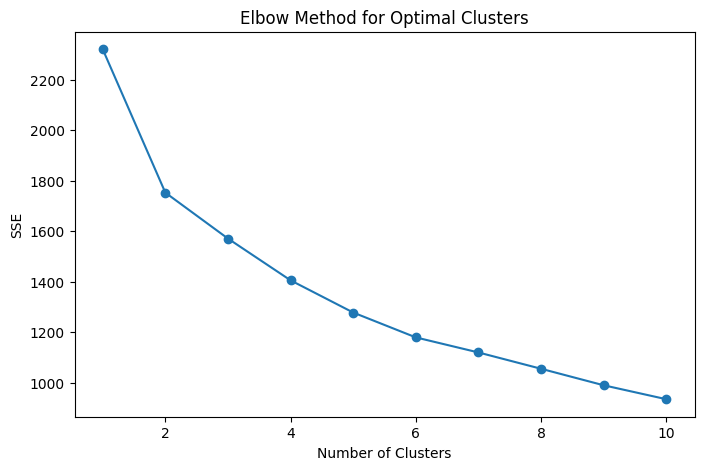

In [ ]:
# Elbow method to find the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method for Optimal Clusters')
plt.show()


##**7.Perform K-means clustering**

In [ ]:
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_df)


##**8.Visualize customer segments**

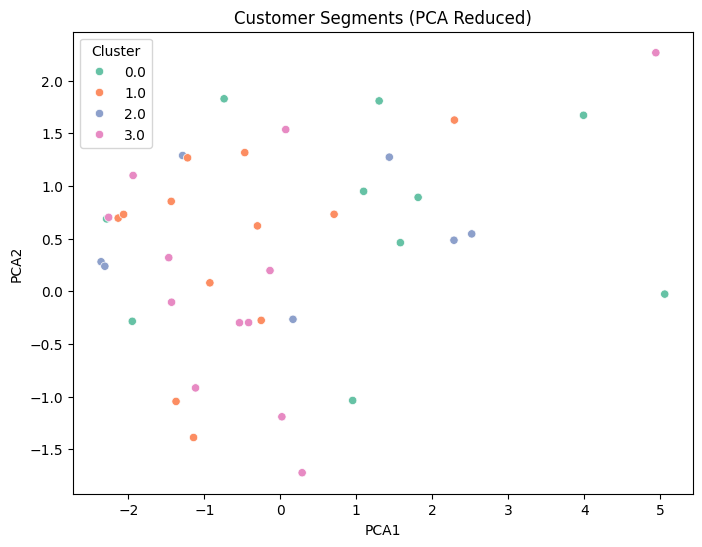

In [ ]:
# Perform PCA to reduce dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

# Create a DataFrame for visualization
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = data['Cluster']

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2')
plt.title('Customer Segments (PCA Reduced)')
plt.show()


##**9.Analyze customer segments**

In [ ]:
# Analyze mean values of each cluster
cluster_summary = data.groupby('Cluster')[numerical_cols].mean()
print(cluster_summary)

# Count of customers in each cluster
cluster_counts = data['Cluster'].value_counts()
print(cluster_counts)


           Recency    MntTotal  NumDealsPurchases  NumWebPurchases  \
Cluster                                                              
0        51.230769   47.131868           1.461538         1.461538   
1        52.515625  122.562500           2.515625         2.468750   
2        51.220000   91.540000           3.020000         2.880000   
3        48.788235   33.952941           1.235294         1.141176   

         NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth       Age  
Cluster                                                                       
0                   0.054945           3.153846           5.615385  5.945055  
1                   1.125000           3.390625           5.656250  6.250000  
2                   0.040000           3.620000           7.400000  6.400000  
3                   0.129412           2.435294           7.541176  6.623529  
Cluster
0    91
3    85
1    64
2    50
Name: count, dtype: int64


##**10.Visualization**

**(a) Spending by cluster**

<ipython-input-62-19880087025f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='MntTotal', data=data, palette='Set3')


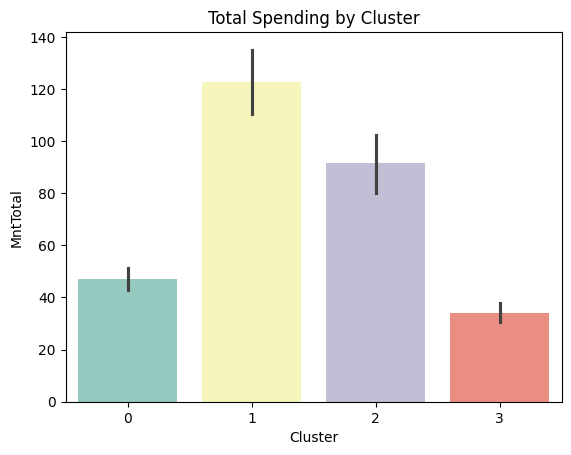

In [ ]:
sns.barplot(x='Cluster', y='MntTotal', data=data, palette='Set3')
plt.title('Total Spending by Cluster')
plt.show()


**(b) Recency by cluster**

<ipython-input-63-0109dbb66464>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='Recency', data=data, palette='Set1')


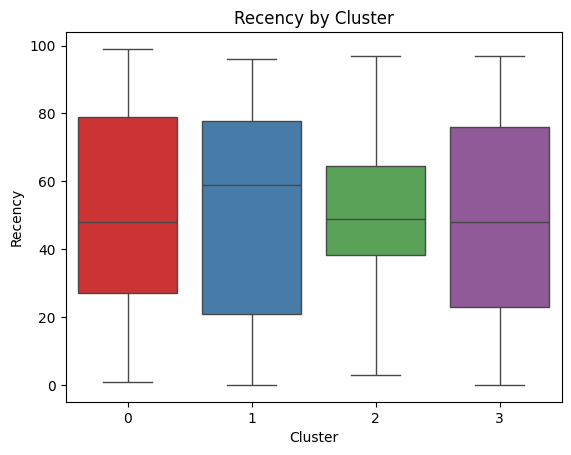

In [ ]:
sns.boxplot(x='Cluster', y='Recency', data=data, palette='Set1')
plt.title('Recency by Cluster')
plt.show()


**(c) Purchasing Behaviour by cluster**

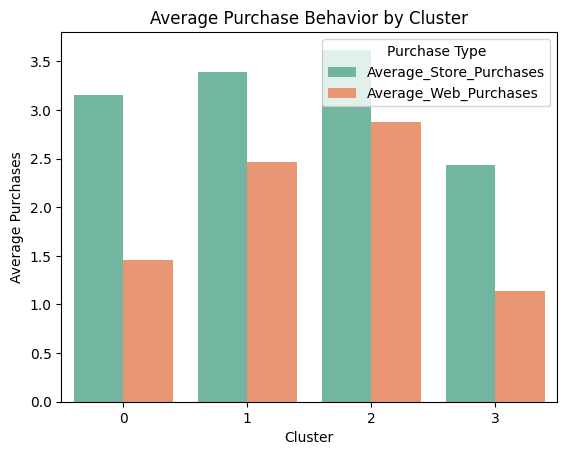

In [ ]:
# Visualizing purchase behavior
purchase_behavior = cluster_summary[['Cluster', 'Average_Store_Purchases', 'Average_Web_Purchases']].melt(
    id_vars=['Cluster'], var_name='Purchase_Type', value_name='Average_Purchases'
)
sns.barplot(x='Cluster', y='Average_Purchases', hue='Purchase_Type', data=purchase_behavior, palette='Set2')
plt.title('Average Purchase Behavior by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Purchases')
plt.legend(title='Purchase Type')
plt.show()


##**11.Insights and Recommendations**

In [ ]:
# Aggregating key metrics for each cluster
cluster_summary = data.groupby('Cluster').agg(
    Average_Spending=('MntTotal', 'mean'),
    Average_Recency=('Recency', 'mean'),
    Average_Store_Purchases=('NumStorePurchases', 'mean'),
    Average_Web_Purchases=('NumWebPurchases', 'mean'),
    Average_Age=('Age', 'mean'),
    Customer_Count=('Cluster', 'size')
).reset_index()

print("Cluster Summary:")
print(cluster_summary)


Cluster Summary:
   Cluster  Average_Spending  Average_Recency  Average_Store_Purchases  \
0        0         47.131868        51.230769                 3.153846   
1        1        122.562500        52.515625                 3.390625   
2        2         91.540000        51.220000                 3.620000   
3        3         33.952941        48.788235                 2.435294   

   Average_Web_Purchases  Average_Age  Customer_Count  
0               1.461538     5.945055              91  
1               2.468750     6.250000              64  
2               2.880000     6.400000              50  
3               1.141176     6.623529              85  


**Cluster 0: Low Spending, High Recency, Moderate Store Purchases**

**Insights:**

This cluster most probably is highly engaged customers who are frequent buyers of smaller purchases and relatively recent in their buying behavior. The average spending is lower, which might be due to budget-conscious or infrequent buying. Their relatively low web purchases indicate they might prefer to shop in-store but occasionally go online


**Recommendations:**

Retain these customers. Offer customized promotions or loyalty programs to increase spending. Improve web engagement through marketing campaigns targeted at higher online purchase sales. Increase in-store spending with exclusive offers or product bundles.

---
**Cluster 1: High Spending, Moderate Recency, Moderate Store Purchases**

**Insights:**

This is a high-value customer cluster that tends to spend more per transaction. The customers have a moderate recency score, meaning they purchase regularly but not as frequently as Cluster 0. Their high web purchases indicate that they are comfortable with online shopping, so they could be key targets for digital campaigns.

**Recommendations:**

Increase loyalty efforts to retain these high-value customers and keep them active and spending. Personalized recommendations should both drive online and in-store buys. Targeted offers based on their past purchases and browse history should drive even more spend.


---

**Cluster 2: Moderate Spending, High Recency, High Store Purchases**

**Insights:**

This category has a higher tendency to make purchases in-store as well as through online channels. They have an average amount of spending but frequent involvement across different channels. They might be "omnichannel" shoppers, meaning they would prefer a seamless experience of online and in-store shopping.

**Recommendations:**

Enable omnichannel engagement with cross-channel offers such as store check-in offers available online or vice versa. Maintain interest in both the online and offline experience to protect and grow this cohort. Offer reward or points redeemable for switching from online to offline or vice versa purchases.

---
**Cluster 3: Low Spending, Moderate Recency, Low Store Purchases**

**Insights:**

This cluster represents customers who have low engagement in general, low spending, and low purchases across both online and offline channels, and moderate recency but low engagement suggests that they are unlikely to be frequent buyers or may even be inactive customers.

**Recommendations:**

Re-engage them with offers and incentives that could encourage them to return and spend more. Perhaps a discount or incentive based on past interests can be offered to these customers. Analyze why these customers are not purchasing regularly and offer tailored experiences or product recommendations to increase their interest. Target them with promotions appealing to their previous behaviors, focusing on low-cost, high-value products.